<a href="https://colab.research.google.com/github/andreregino/network-science-notebooks/blob/main/Random_Failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import matplotlib.pyplot as plt
import networkx as netx
import random
import pandas as pd
import numpy as np

In [19]:
# remove a certain number of nodes
# if the node does not exist, search random
def remove_random_node(G, n):
  node = np.random.choice(G.nodes, n)
  for i in range(n):
    for k in range(100):
      if G.has_node(node[i] + k):
        G.remove_node(node[i] + k)
        break

In [20]:
# reading the graph file
graph = pd.read_csv("netA.txt", sep = '\t', header=None)

# understanding the data
print(graph.head())
print(graph.tail())

   0    1
0  0  496
1  0  499
2  0  502
3  0  504
4  0  589
         0     1
5797  1037   589
5798  1037  1034
5799  1038   249
5800  1038   589
5801  1038   819


In [21]:
# initial state
G = netx.from_pandas_edgelist(df=graph, source=0, target=1)
print("Initial number of nodes:", len(G.nodes))
print("Initial number of edges:", len(G.edges))
removed_nodes = len(G.nodes) * 0.05
print("Number of nodes to be removed in each iteration", removed_nodes)
sorted_connected_components = sorted(netx.connected_components(G), key=len, reverse=True)
print("Biggest component size:", len(sorted_connected_components[0]))
print("Initially, the network has 1 giant component with number of nodes equal to the total number of nodes of the whole network")

Initial number of nodes: 1039
Initial number of edges: 4741
Number of nodes to be removed in each iteration 51.95
Biggest component size: 1039
Initially, the network has 1 giant component with number of nodes equal to the total number of nodes of the whole network


In [22]:
func = []
f = 0.05
for i in range(20):
  
  remove_random_node(G, int(removed_nodes))
  sorted_connected_components = sorted(netx.connected_components(G), key=len, reverse=True)
  #print("Tamanho do maior componente:", len(sorted_connected_components[0]))
  #print(len(sorted_connected_components[0]) / len(G.nodes))
  print("f: ", f, "number of nodes:", len(G.nodes), "size of biggest connected component:", len(sorted_connected_components[0]), "P ratio:", len(sorted_connected_components[0]) / len(G.nodes))
  func.append(len(sorted_connected_components[0]) / len(G.nodes))
  f+=0.05

f:  0.05 number of nodes: 988 size of biggest connected component: 988 f value: 1.0
f:  0.1 number of nodes: 937 size of biggest connected component: 937 f value: 1.0
f:  0.15000000000000002 number of nodes: 886 size of biggest connected component: 885 f value: 0.9988713318284425
f:  0.2 number of nodes: 835 size of biggest connected component: 832 f value: 0.9964071856287425
f:  0.25 number of nodes: 784 size of biggest connected component: 780 f value: 0.9948979591836735
f:  0.3 number of nodes: 733 size of biggest connected component: 726 f value: 0.990450204638472
f:  0.35 number of nodes: 682 size of biggest connected component: 674 f value: 0.9882697947214076
f:  0.39999999999999997 number of nodes: 631 size of biggest connected component: 620 f value: 0.9825673534072901
f:  0.44999999999999996 number of nodes: 580 size of biggest connected component: 571 f value: 0.9844827586206897
f:  0.49999999999999994 number of nodes: 529 size of biggest connected component: 521 f value: 0.9

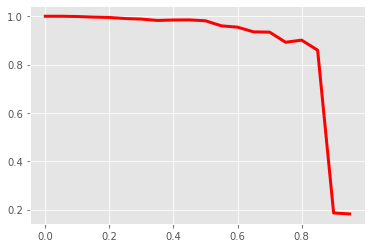

The value 0.8766 is the value f for which the ratio falls to 0.5010479338842977


In [67]:
plt.style.use('ggplot')
lines = plt.plot(np.arange(0,1, 0.05), func, color='red', linewidth=3)
plt.show()
print("The value", 0.8766, "is the value f for which the ratio falls to", np.interp(0.8766, np.arange(0,1, 0.05), func))

The network is robust to random failures, given that we need to remove 87% of its node to drop the ratio to 50%.